<a href="https://colab.research.google.com/github/kimtaehan01/ComputerVision/blob/main/computerVision_20200593_%EA%B9%80%ED%83%9C%ED%95%9C_%EB%91%90%EB%B2%88%EC%A8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. 그림 3-13(a)의 입력 영상에 대해 다음 구조 요소를 이용해 팽창한 영상과 침식한 영상을 제시하시오.



In [ ]:
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
input_img=[[0,0,0,0,0,0,0,0],[0,0,0,1,0,0,0,0],[0,1,1,1,1,1,0,0],[0,1,1,0,1,1,1,0]]
input_img = np.array(input_img)
print(input_img)

[[0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0]
 [0 1 1 1 1 1 0 0]
 [0 1 1 0 1 1 1 0]]


팽창

In [ ]:
print(input_img.shape[0]-1)

3


In [ ]:
expansion_img=np.zeros((4,8))
for i in range(0, input_img.shape[0]):
    for j in range(0, input_img.shape[1]-1):
        if input_img[i, j] == 1:
            expansion_img[i, j] = 1
            if input_img[i, j-1] == 0 or input_img[i,j+1]==0:
                expansion_img[i, j] = 1
                expansion_img[i, j+1] = 1
                expansion_img[i, j-1] = 1


print(expansion_img)

[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1.]]


침식

In [ ]:

corrosion_img=np.zeros((4,8))
for i in range(0, input_img.shape[0]):
    for j in range(0, input_img.shape[1]-1):
        if input_img[i, j] == 1:
            if input_img[i, j-1] == 1 and input_img[i,j+1]==1:
                corrosion_img[i, j] = 1
        else:
            corrosion_img[i, j] = 0
print(corrosion_img)

[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]]


2. 다음 5X5 영상에 대해 히스토그램 평활화를 수행하시오. 최종적으로 히스토그램 평활화된 이미지를 표시하시오. (10점)

힌트: opencv 라이브러리의 함수들을 사용해도 무방하나, 추천하지 않음. (원래 5X5 영상 화소 범위가 0~7이고, opencv 함수는 범위를 0~255로 간주.)

﻿(숫자로 표현해도, cv2_imshow 함수를 사용해서 표현해도, 한글이나 워드파일 형식으로 작성해도 무방함)



[[0 0 1 1 3]
 [2 3 3 3 3]
 [3 3 4 4 4]
 [4 3 4 5 7]
 [4 4 4 5 7]]
[2. 2. 1. 8. 8. 2. 0. 2.]


<BarContainer object of 8 artists>

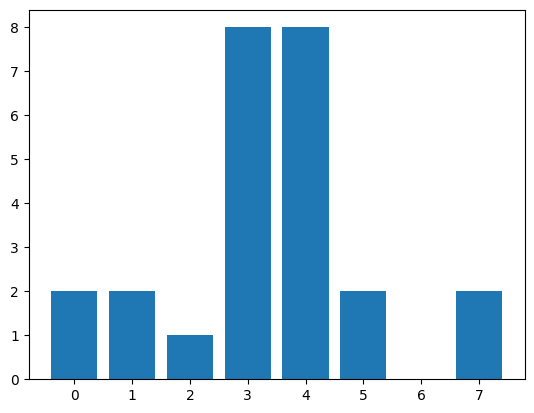

In [ ]:
img=[[0,0,1,1,3],[2,3,3,3,3],[3,3,4,4,4],[4,3,4,5,7],[4,4,4,5,7]]
img = np.array(img)
print(img)

histogram = np.zeros((8))
height = img.shape[0]
width = img.shape[1]

for i in range(height):
    for j in range(width):
        histogram[int(img[i][j])] += 1
print(histogram)

import matplotlib.pyplot as plt
plt.bar(range(len(histogram)), histogram)

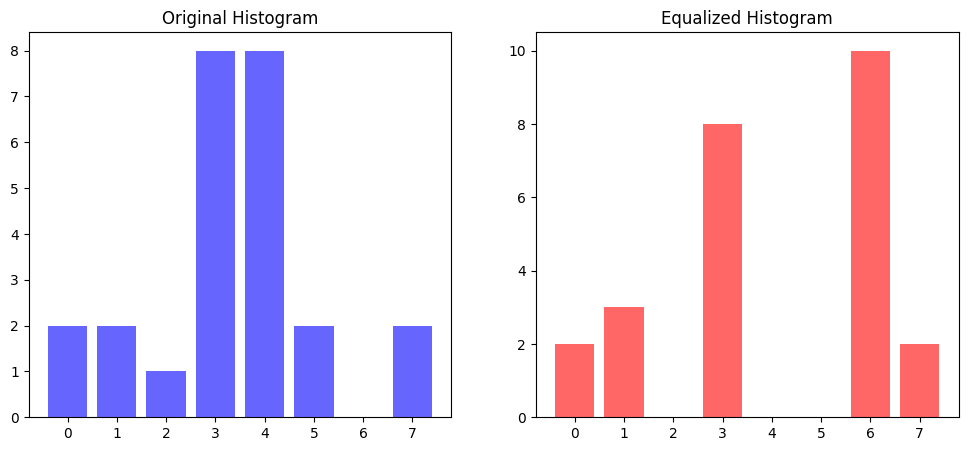

원본 이미지:
 [[0 0 1 1 3]
 [2 3 3 3 3]
 [3 3 4 4 4]
 [4 3 4 5 7]
 [4 4 4 5 7]]
히스토그램 평활화 적용 이미지:
 [[0 0 1 1 3]
 [1 3 3 3 3]
 [3 3 6 6 6]
 [6 3 6 6 7]
 [6 6 6 6 7]]


In [ ]:

histogram = np.zeros(8, dtype=int)
for i in range(height):
    for j in range(width):
        histogram[img[i, j]] += 1


cdf = np.cumsum(histogram)
cdf_min = cdf[cdf > 0].min()


hisMatch = np.round((cdf - cdf_min) / (height * width - cdf_min) * 7).astype(int)


equalized_img = np.zeros_like(img)
for i in range(height):
    for j in range(width):
        equalized_img[i, j] = hisMatch[img[i, j]]


equalized_hist = np.zeros(8, dtype=int)
for i in range(height):
    for j in range(width):
        equalized_hist[equalized_img[i, j]] += 1


plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.bar(range(8), histogram, color='blue', alpha=0.6)
plt.title("Original Histogram")
plt.xticks(range(8))

plt.subplot(1, 2, 2)
plt.bar(range(8), equalized_hist, color='red', alpha=0.6)
plt.title("Equalized Histogram")
plt.xticks(range(8))

plt.show()


print("원본 이미지:\n", img)
print("히스토그램 평활화 적용 이미지:\n", equalized_img)
